# Importing Libraries

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

# Data Preprocessing and Cleaning

In [35]:
#loading the dataset
Excel= 'D://NCI//DMML//Dataset//stroke.csv'
df= pd.read_csv (Excel)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [36]:
del df['id']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [37]:
print(df.isnull().sum())


gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [38]:
# Converting varibales to binary using LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df_encoded = df.apply(le.fit_transform)
df_encoded

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,24,0,0,0,4,0,3984,74,3,0
1,1,79,1,0,1,2,1,3268,286,1,0
2,0,29,0,0,0,2,1,5544,70,3,0
3,0,91,0,0,1,2,0,1378,253,0,0
4,1,35,0,0,0,1,0,8677,85,3,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,31,0,0,0,4,1,354,98,1,0
43396,0,77,0,0,1,0,1,10967,448,0,0
43397,0,103,1,0,1,2,1,3666,183,0,0
43398,1,61,0,0,1,2,1,4388,226,1,0


In [39]:
features = ['gender','age','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi', 'smoking_status']
ft_to_scale = ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']
scaler = StandardScaler()
df_encoded[ft_to_scale] = scaler.fit_transform(df_encoded[ft_to_scale])

In [40]:
df_encoded

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,-1.688131,0,0,0,1.659945,0,-0.117418,-1.166501,1.286407,0
1,1,0.695362,1,0,1,-0.169637,1,-0.358771,0.918728,-0.539686,0
2,0,-1.471450,0,0,0,-0.169637,1,0.408436,-1.205844,1.286407,0
3,0,1.215397,0,0,1,-0.169637,0,-0.995862,0.594141,-1.452733,0
4,1,-1.211433,0,0,0,-1.084428,0,1.464524,-1.058305,1.286407,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,-1.384778,0,0,0,1.659945,1,-1.341038,-0.930437,-0.539686,0
43396,0,0.608689,0,0,1,-1.999219,1,2.236450,2.512157,-1.452733,0
43397,0,1.735432,1,0,1,-0.169637,1,-0.224611,-0.094378,-1.452733,0
43398,1,-0.084690,0,0,1,-0.169637,1,0.018765,0.328569,-0.539686,0


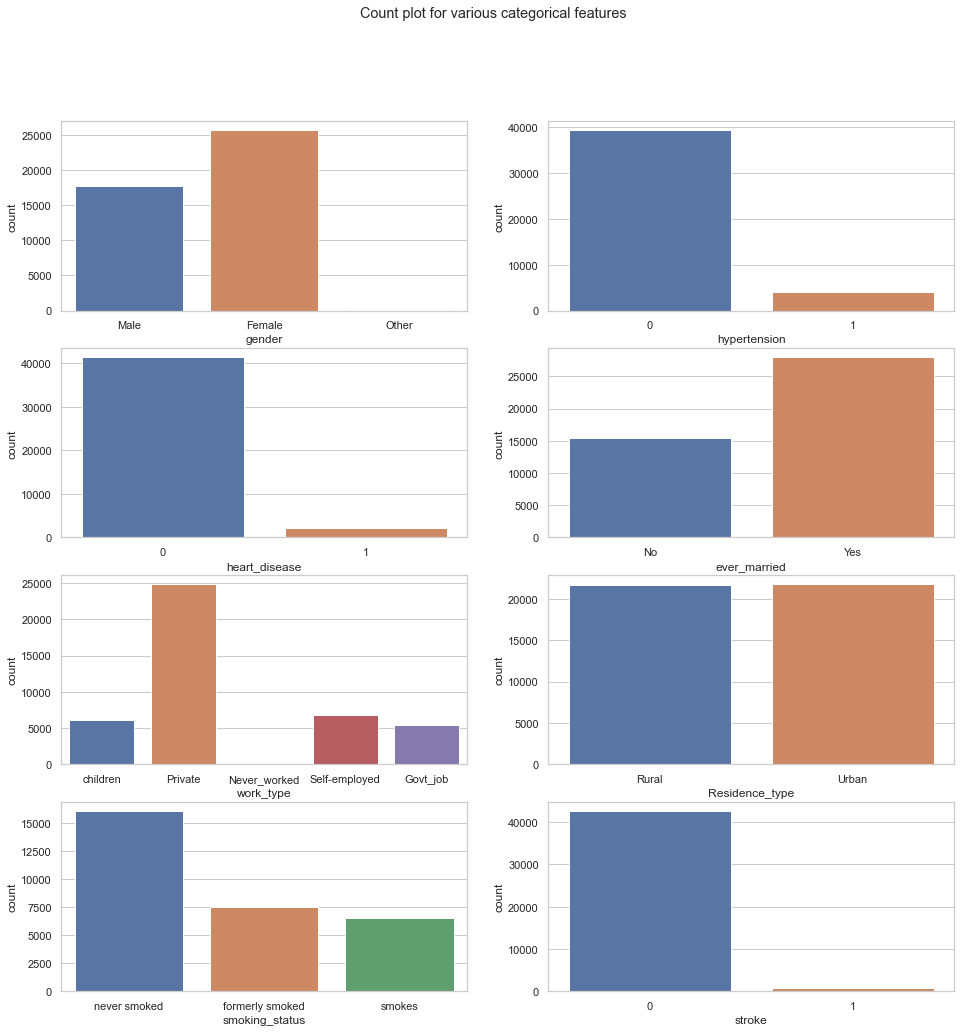

In [41]:
# checking the columns by doing visualization and counting the number of columns 
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

# Creating the Correlation and Heatmap

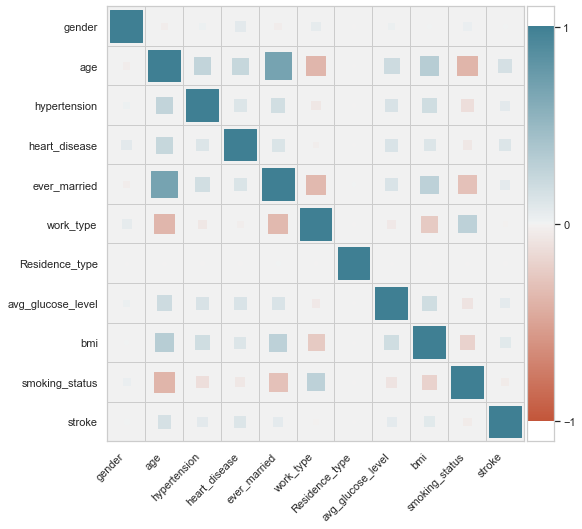

In [42]:
column_mean_value = df_encoded.bmi.mean()
df_encoded.bmi = df_encoded.bmi.fillna(column_mean_value)
plt.figure(figsize=(8, 8))
corrplot(df_encoded.corr(), size_scale=1000);

In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  int32  
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  int32  
 5   work_type          43400 non-null  float64
 6   Residence_type     43400 non-null  int32  
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                43400 non-null  float64
 9   smoking_status     43400 non-null  float64
 10  stroke             43400 non-null  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 3.1 MB


# Splitting the Dataset into Train and Test 

In [44]:

X = df_encoded[features]
y = df_encoded['stroke']
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (34720, 10)
Number transactions y_train dataset:  (34720,)
Number transactions X_test dataset:  (8680, 10)
Number transactions y_test dataset:  (8680,)


# Oversampling over test and train dataset

In [46]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 650
Before OverSampling, counts of label '0': 34070 

After OverSampling, the shape of train_X: (68140, 10)
After OverSampling, the shape of train_y: (68140,) 

After OverSampling, counts of label '1': 34070
After OverSampling, counts of label '0': 34070


# Logistic Regression Evaluation Method

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8547
           1       0.05      0.84      0.09       133

    accuracy                           0.74      8680
   macro avg       0.52      0.79      0.47      8680
weighted avg       0.98      0.74      0.84      8680



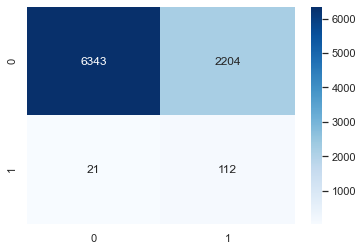

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train_res, y_train_res)
Y_pred = log_reg.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))

# SVM Classifier Evaluation Method

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      8547
           1       0.05      0.65      0.09       133

    accuracy                           0.79      8680
   macro avg       0.52      0.72      0.48      8680
weighted avg       0.98      0.79      0.87      8680



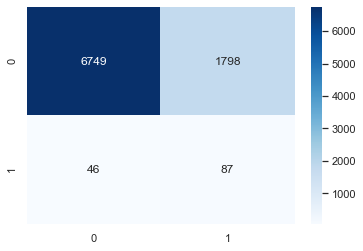

In [49]:
clf = svm.SVC()
clf.fit(X_train_res, y_train_res)
Y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))

# Random Forest Classifier Evaluation Method

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8547
           1       0.05      0.11      0.07       133

    accuracy                           0.95      8680
   macro avg       0.52      0.54      0.52      8680
weighted avg       0.97      0.95      0.96      8680



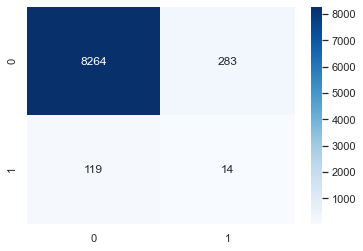

In [50]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 1, criterion='gini')
# Train the model on training data
rf.fit(X_train_res, y_train_res)
Y_pred = rf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, Y_pred),annot=True,fmt='d',cmap='Blues')
print(classification_report(y_test, Y_pred))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# ROC Curve for all the Methods

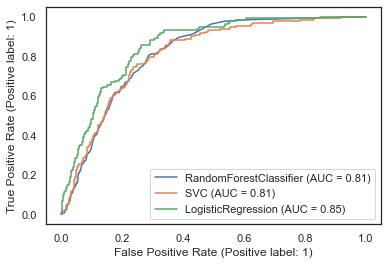

In [53]:
dis= plot_roc_curve (rf, X_test, y_test)
plot_roc_curve (clf, X_test, y_test, ax= dis.ax_)
plot_roc_curve (log_reg, X_test, y_test, ax=dis.ax_)